<a href="https://colab.research.google.com/github/Tanvi-Shukla08/Number-Plate-Detection-/blob/main/Number_Plate_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 47.6 MB 2.1 MB/s 
     |████████████████████████████████| 604 kB 50.1 MB/s 
     |████████████████████████████████| 120 kB 59.5 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [ ]:
def model(path):
  img = cv2.imread(path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
  edged = cv2.Canny(bfilter, 30, 200)
  keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
  location = None
  for contour in contours:
      approx = cv2.approxPolyDP(contour, 10, True)
      if len(approx) == 4:
          location = approx
          break
  mask = np.zeros(gray.shape, np.uint8)
  new_image = cv2.drawContours(mask, [location], 0,255, -1)
  new_image = cv2.bitwise_and(img, img, mask=mask)
  (x,y) = np.where(mask==255)
  (x1, y1) = (np.min(x), np.min(y))
  (x2, y2) = (np.max(x), np.max(y))
  cropped_image = gray[x1:x2+1, y1:y2+1]
  plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

please enter path of image.image1.jpg


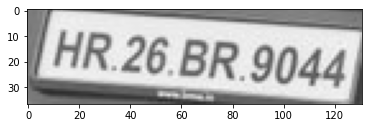

In [ ]:
path=input('please enter path of image.')
model(path)